We apply Cholesky Decomposition to generate correlated Brownian Motion from two independent Brownian Motions. Define
$$ C = \begin{pmatrix} 1 & \rho_{1,2} \\ \rho_{1,2} & 1 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ \rho_{1,2} & \sqrt{1 - \rho_{1,2} } \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ \rho_{1,2} & \sqrt{1 - \rho_{1,2} } \end{pmatrix} $$

To correlate the independent Brownian Motions:

$$\begin{pmatrix} 1 & 0 \\ \rho_{1,2} & \sqrt{1 - \rho_{1,2} } \end{pmatrix} \cdot \begin{pmatrix} W_1 \\ W_2  \end{pmatrix} = \begin{pmatrix} W_1(t) \\ \rho_{1,2} W_1(t) + \sqrt{ 1 - \rho_{1,2}} W_2(t) \end{pmatrix}$$

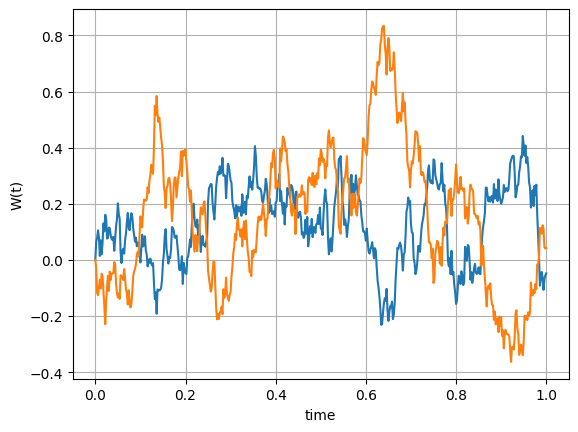

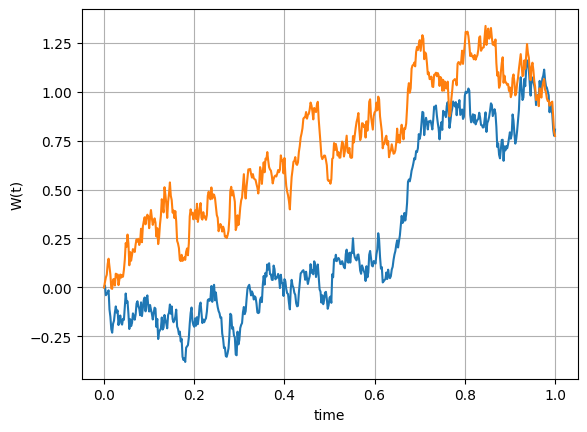

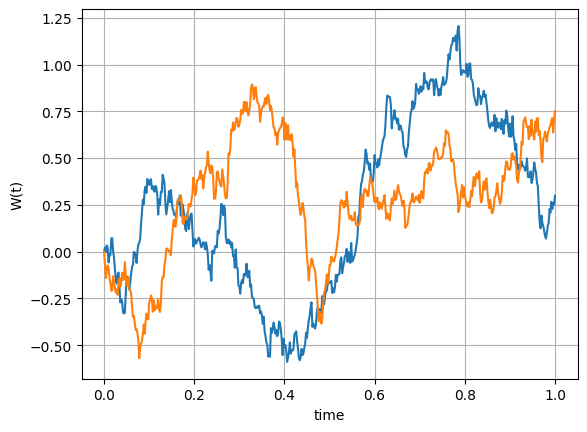

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho):
    # Matrices of random samples    
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    Z2 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    W2 = np.zeros([NoOfPaths, NoOfSteps+1])    
    
    dt = T / float(NoOfSteps)
    time = np.zeros([NoOfSteps+1])
    
    # Standardize for every time step
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])
            Z2[:,i] = (Z2[:,i] - np.mean(Z2[:,i])) / np.std(Z2[:,i])
        
        # Correlate noises, Cholesky Decomposition step
        Z2[:,i]= rho * Z1[:,i] + np.sqrt(1.0 - rho**2) * Z2[:,i]
        
        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
        W2[:,i+1] = W2[:,i] + np.power(dt, 0.5)*Z2[:,i]
        
        time[i+1] = time[i] +dt
        
    #Store the results
    paths = {"time":time,"W1":W1,"W2":W2}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1.0
    
    ############### Negative correlation ######################
    rho =-0.75
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(W1))   
    plt.plot(timeGrid, np.transpose(W2))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
    ############### Positive correlation ######################
    rho =0.75
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(W1))   
    plt.plot(timeGrid, np.transpose(W2))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
    
    ############### Zero correlation ######################
    rho =0.0
    Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
    timeGrid = Paths["time"]
    W1 = Paths["W1"]
    W2 = Paths["W2"]
    
    plt.figure(3)
    plt.plot(timeGrid, np.transpose(W1))   
    plt.plot(timeGrid, np.transpose(W2))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("W(t)")
mainCalculation()